# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [33]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [34]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[int(num_test/2):], newsgroups_test.target[int(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:int(num_test/2)], newsgroups_test.target[:int(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape) 
print('dev label shape:', dev_labels.shape) 
print('labels names:', newsgroups_train.target_names) 

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [26]:
#def P1(num_examples=5):
### STUDENT START ###
#Print the first five training examples
for i in range (1,5):
    print(i, " - Chat Message Content")
# Print the text of the message
    print(train_data[i])
# Print the label
    if (train_labels[i] == 0):
        print('Label is alt.atheism');
    if (train_labels[i] == 1):
        print('Label is comp.graphics');
    if (train_labels[i] == 2):
        print('Label is sci.space');
    if (train_labels[i] == 3):
        print('Label is talk.religion.misc');
    print("-------------------------------------------------------------------------------")
### STUDENT END ###
#P1(2)

1  - Chat Message Content


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.
Label is talk.religion.misc
-------------------------------------------------------------------------------
2  - Chat Message Content

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.com (Mark Brader) 

MB>                                                             So the
MB> 1970 figure seems unlikely to actually be anything but a perijove.

JG>Sorry, _perijoves_...I'm not used to talking this language.

Couldn't we just say periapsis or apoapsis?

 
Label is sci.space
-------------------------------------------------------------------------------
3  - Chat Message Content
I have a request for those who would like to see Ch

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [28]:
#def P2():
### STUDENT START ###
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(train_data)
numsamples = X.shape[0]
vocabsize = X.shape[1]
nonzerofeatures = X.nnz

# a. What is the size of the vocabulary?
print("P2 a - Size of the vocabulary is", vocabsize)
print("P2 a - nonzerofeatures is", nonzerofeatures)

# a. What is the average number of non-zero features per example?
print("P2 a - Average number of non-zero features per example is", nonzerofeatures/numsamples)

# a.  What fraction of the entries in the matrix are non-zero? ---- VALIDATE if nnz is for the entire matrix
print("P2 a - fraction of the entries in the matrix that are non-zero is", (nonzerofeatures/numsamples)/vocabsize)

# b. What are the 0th and last feature strings (in alphabetical order)? 
# Hint: use the vectorizer's get_feature_names function.
featurename = vectorizer.get_feature_names();
print("P2 b - First Feature Name", featurename[0])
print("P2 b - Last Feature Name", featurename[len(featurename)-1])

# c. Now what's the average number of non-zero features per example? ---- PENDING
p2cvocab = ["atheism", "graphics", "space", "religion"]
p2cvectorizer = CountVectorizer(min_df=1, vocabulary=p2cvocab)
p2cX = p2cvectorizer.fit_transform(train_data)
p2cnumsamples = p2cX.shape[0]
p2cvocabsize = p2cX.shape[1]
p2cnonzerofeatures = p2cX.nnz
print("P2 c - Average number of non-zero features per example is", p2cnonzerofeatures/p2cnumsamples)

# d. What size vocabulary does this yield?  - BIGRAM
p2dvectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'\b\w+\b', min_df=1)
#analyze = p2dvectorizer.build_analyzer()
p2dX = p2dvectorizer.fit_transform(train_data)
p2dvocabsize = p2dX.shape[1]
print("P2 d - Size of the vocabulary with Bigram character features is", p2dvocabsize)

# d. What size vocabulary does this yield?  - TRIGRAM
p2dvectorizer = CountVectorizer(ngram_range=(3, 3), token_pattern=r'\b\w+\b', min_df=1)
#analyze = p2dvectorizer.build_analyzer()
p2dX = p2dvectorizer.fit_transform(train_data)
p2dvocabsize = p2dX.shape[1]
print("P2 d - Size of the vocabulary with Trigram character features is", p2dvocabsize)

# e.  Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?
p2evectorizer = CountVectorizer(min_df=10)
p2eX = p2evectorizer.fit_transform(train_data)
p2evocabsize = p2eX.shape[1]
print("P2 e - Size of the vocabulary that appear in more than 9 documents is ", p2evocabsize)

# f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? 
# Hint: build a vocabulary for both train and dev and look at the size of the difference.
print("type ", type(train_data))
combinedTrainDev_data = train_data + dev_data
p2fvectorizer = CountVectorizer()
p2fX = p2fvectorizer.fit_transform(combinedTrainDev_data)
TDvocabsize = p2fX.shape[1]

p2fvectorizer = CountVectorizer()
p2fX1 = p2fvectorizer.fit_transform(dev_data)
Dvocabsize = p2fX1.shape[1]

print("P2 f - fraction of dev data missing from the vocab", (TDvocabsize-Dvocabsize)/Dvocabsize)
### STUDENT END ###
#P2()

P2 a - Size of the vocabulary is 26879
P2 a - nonzerofeatures is 196700
P2 a - Average number of non-zero features per example is 96.70599803343165
P2 a - fraction of the entries in the matrix that are non-zero is 0.003597827226959026
P2 b - First Feature Name 00
P2 b - Last Feature Name zyxel
P2 c - Average number of non-zero features per example is 0.26843657817109146
P2 d - Size of the vocabulary with Bigram character features is 196592
P2 d - Size of the vocabulary with Trigram character features is 329274
P2 e - Size of the vocabulary that appear in more than 9 documents is  3064
type  <class 'list'>
P2 f - fraction of dev data missing from the vocab 0.9023759694694079


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [30]:
#def P3():
### STUDENT START ###
p3vectorizer = CountVectorizer()
p3train_data = p3vectorizer.fit_transform(train_data)

# Use the same vectorizer as the training data, so that the same vocabulary is used
p3dev_data = p3vectorizer.transform(dev_data)

# Print the shape attributes to check if the same vocabulary is used
#print(p3train_data.shape)
#print(p3dev_data.shape)

# K-Nearest Neighbors Classifier
KNclf = KNeighborsClassifier(n_neighbors=100)
# Train the model with the training data set 
KNclf.fit(p3train_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = KNclf.predict(p3dev_data)
# Compare predicted labels with actual labels
print("P3 F1 score for K Nearest Neighbors algorithm is ", metrics.f1_score(dev_labels, prediction, average='macro'))  

# Find the Optimal Value of K
parameters = [{'n_neighbors':[1,3,5,10,20,50,100, 200, 500, 1000]}]
KNGclf = GridSearchCV(KNeighborsClassifier(weights='distance'), parameters)
KNGclf.fit(p3train_data,train_labels)
print("============================== K Nearest Neighbor =======================================")
# Print the best estimator
print("Best Estimator", KNGclf.best_estimator_)
# Print the best score
print("Best Score", KNGclf.best_score_)
# Print the best alpha
print("Best Parameter",KNGclf.best_params_)



# MultinomialNB Classifier - Find the Optimal Value of alpha
parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}]
MNBclf = GridSearchCV(MultinomialNB(class_prior=None, fit_prior=True), parameters)
MNBclf.fit(p3train_data,train_labels)
print("============================== MultinomialNB =======================================")
# Print the best estimator
print("Best Estimator", MNBclf.best_estimator_)
# Print the best score
print("Best Score", MNBclf.best_score_)
# Print the best alpha
print("Best Parameter",MNBclf.best_params_)


#Get the baseline F1
LRclf = LogisticRegression(C=0.1)
LRclf.fit(p3train_data,train_labels)
LRprediction = LRclf.predict(p3dev_data)
print("P3 F1 score for Logistic Regression algorithm is ", metrics.f1_score(dev_labels, LRprediction, average='macro'))

# Fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization
parameters = {'C': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 10] }
LRclf = GridSearchCV(LogisticRegression(penalty='l2'), parameters)
LRclf.fit(p3train_data,train_labels)
print("============================== Logistic Regression =======================================")
# Print the best estimator
print("Best Estimator", LRclf.best_estimator_)
# Print the best score
print("Best Score", LRclf.best_score_)
# Print the best alpha
print("Best Parameter",LRclf.best_params_)

#Output the sum of the squared weight values for each class for each setting of the C parameter. 
cvalues = [0.001, 0.01, 0.1, 0.2, 0.5, 1, 10]

for c in cvalues:
        LRclf = LogisticRegression(C=c)
        LRclf.fit(p3train_data, train_labels)        
        print ("C : ",c)
        # Square coefficients, then sum for each class. Round to 2 decimal points.
        print ("Sum of squared weight values : ", np.round(np.square(LRclf.coef_).sum(axis=1),2))
#############PENDING - Briefly explain the relationship between the sum and the value of C.



### STUDENT END ###
#P3()

P3 F1 score for K Nearest Neighbors algorithm is  0.426225670091
============================== K Nearest Neighbor =======================================
Best Estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=200, p=2,
           weights='distance')
Best Score 0.447394296952
Best Parameter {'n_neighbors': 200}
============================== MultinomialNB =======================================
Best Estimator MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
Best Score 0.828416912488
Best Parameter {'alpha': 0.01}
P3 F1 score for Logistic Regression algorithm is  0.679433709916
============================== Logistic Regression =======================================
Best Estimator LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear',

ANSWER:
From the above computations, 
K-nearest neighbors classifier: Optimal value for k is 200
Multinomial Naive Bayes model: Optimal value for alpha is 0.01
Logistic regression model: Optimal value for the regularization strength C using l2 regularization is 0.2

a. Why doesn't nearest neighbors work well for this problem?
Nearest Neighbor does not work for this problem, because we have a huge number of features or dimensions. The distance metric used in the Nearest Neighbor is high with the high number of dimensions and the classifier is unable to clearly identify the right class. 

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?
Logistic Regression works better than Nearest Neighbors, but performs poorer than Naive Bayes. In Naive Bayes, we assume conditional independence of the appearance of the words (features). This assumption seems to be fairly reasonable for this problem. Logistic Regression assumes a linear relationship between the logit of the words and the class. This assumption may not be completely valid. 

c. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C

We can observe that the sum of the squared weight values increases with increase in the C parameter. C is the inverse of regularization (penalization) parameter. As you penalize the model more (with lower values of C) the model reduces the weights to make the model more parsimonious and vice versa.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [71]:
#def P4():
### STUDENT START ###
p4vectorizer = CountVectorizer()
p4train_data = p4vectorizer.fit_transform(train_data)

# Use the same vectorizer as the training data, so that the same vocabulary is used
p4dev_data = p4vectorizer.transform(dev_data)

#Train a Logistic regression model
p4LRclf = LogisticRegression(C=0.1, penalty='l2')
p4LRclf.fit(p4train_data, train_labels) 
weightvectorC1 = list(p4LRclf.coef_[0])
weightvectorC2 = list(p4LRclf.coef_[1])
weightvectorC3 = list(p4LRclf.coef_[2])
weightvectorC4 = list(p4LRclf.coef_[3])

featurenames = list(p4vectorizer.get_feature_names())
max_val = []
max_idx = []
classfeatures = []
w, h = 5, 20 
classf = [[0 for x in range(w)] for y in range(h)] 
#classf = np.zeros((20, 5))
#print("Class Weights for alt.atheism")
for i in range(0, 20):
    if (i<5):
        
        max_val.append(max(weightvectorC1))
        max_idx.append(weightvectorC1.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC1.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][1] = np.round(max_val[i],3)
        #print(max_val[i])
        #print(max_idx[i])
        #print(classfeatures[i])
    
    if(i>=5 and i<10):
        max_val.append(max(weightvectorC2))
        max_idx.append(weightvectorC2.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC2.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][2] = np.round(max_val[i],3)
        
    if(i>=10 and i<15):
        max_val.append(max(weightvectorC3))
        max_idx.append(weightvectorC3.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC3.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][3] = np.round(max_val[i],3)
                
    if(i>=15):
        max_val.append(max(weightvectorC4))
        max_idx.append(weightvectorC4.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC4.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][4] = np.round(max_val[i],3)
        
        
print("============================= Class Weights for Unigram ============================ ")
#print(type(classf))
header = ["Feature", "Class 1 Wt", "Class 2 Wt", "Class 3 Wt", "Class 4 Wt"]
row_format ="{:>15}" * (len(header))
print(row_format.format(*header))
for row in classf:
    print(row_format.format(*row))

######## For bigram
p4vectorizer = CountVectorizer(ngram_range=(2,2))
p4train_data = p4vectorizer.fit_transform(train_data)

# Use the same vectorizer as the training data, so that the same vocabulary is used
p4dev_data = p4vectorizer.transform(dev_data)

p4LRclf = LogisticRegression(C=0.1, penalty='l2')
p4LRclf.fit(p4train_data, train_labels) 
weightvectorC1 = list(p4LRclf.coef_[0])
weightvectorC2 = list(p4LRclf.coef_[1])
weightvectorC3 = list(p4LRclf.coef_[2])
weightvectorC4 = list(p4LRclf.coef_[3])

featurenames = list(p4vectorizer.get_feature_names())
max_val = []
max_idx = []
classfeatures = []
w, h = 5, 20 
classf = [[0 for x in range(w)] for y in range(h)] 

for i in range(0, 20):
    if (i<5):
        
        max_val.append(max(weightvectorC1))
        max_idx.append(weightvectorC1.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC1.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][1] = np.round(max_val[i],3)
            
    if(i>=5 and i<10):
        max_val.append(max(weightvectorC2))
        max_idx.append(weightvectorC2.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC2.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][2] = np.round(max_val[i],3)
                
    if(i>=10 and i<15):
        max_val.append(max(weightvectorC3))
        max_idx.append(weightvectorC3.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC3.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][3] = np.round(max_val[i],3)
                 
    if(i>=15):
        max_val.append(max(weightvectorC4))
        max_idx.append(weightvectorC4.index(max_val[i]))
        classfeatures.append(featurenames[max_idx[i]])
        weightvectorC4.pop(int(max_idx[i]))
        classf[i][0] = classfeatures[i]
        classf[i][4] = np.round(max_val[i],3)
                
print("\n")
print("============================= Class Weights for Bigram ============================= ")
print(row_format.format(*header))
for row in classf:
    print(row_format.format(*row))
#print(classf)

p4LRprediction = p4LRclf.predict(p4dev_data)
# Compare predicted labels with actual labels
p4LRaccuracy = p4LRclf.score(p4dev_data, dev_labels)

### STUDENT END ###
#P4()

============================= Class Weights for Unigram ============================ 
        Feature     Class 1 Wt     Class 2 Wt     Class 3 Wt     Class 4 Wt
        atheism          0.496              0              0              0
       relights          0.494              0              0              0
        bobbing          0.478              0              0              0
      atheistic          0.462              0              0              0
          ishii          0.426              0              0              0
       graphics              0          1.007              0              0
           imag              0          0.642              0              0
           file              0          0.641              0              0
       computer              0          0.559              0              0
             3d              0          0.547              0              0
          space              0              0          1.259              0
  

ANSWER:
Any surprising features in this table?
In the unigram set of features - it is surprising to "Fax and email" as one of the top ranking features for "talk.religion" class

In the bigram set of features "cheers kent" is a top ranking feature for both "atheism" and "talk.religion" class. So these features cannot uniquely classify the documents

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [24]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###

    sprocessed = s;
    ##replacing sequences of numbers with a single token
    sprocessed = re.sub("[0-9]", "123", sprocessed)   

    ##removing various other non-letter characters
    sprocessed = re.sub("\W", " ", sprocessed)  

    return sprocessed;
### STUDENT END ###

#def P5():
### STUDENT START ###
#Get the baseline F1
p5vectorizer = CountVectorizer(lowercase=False)
p5train_data = p5vectorizer.fit_transform(train_data)

# Use the same vectorizer as the training data, so that the same vocabulary is used
p5dev_data = p5vectorizer.transform(dev_data)

P5LRclf = LogisticRegression(C=0.1)
P5LRclf.fit(p5train_data,train_labels)
P5LRprediction = P5LRclf.predict(p5dev_data)
baselinef1 = metrics.f1_score(dev_labels, P5LRprediction, average='macro')
print("Baseline F1 score for Logistic Regression algorithm is ", baselinef1)

# Preprocessing the text - stripping accents, eliminating stop words, converting all text to lowercase
p5bvectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', stop_words='english', lowercase=True, preprocessor=better_preprocessor)
p5btrain_data = p5bvectorizer.fit_transform(train_data)

# Use the same vectorizer as the training data, so that the same vocabulary is used
p5bdev_data = p5bvectorizer.transform(dev_data)
P5bLRclf = LogisticRegression(C=0.1)
P5bLRclf.fit(p5btrain_data,train_labels)
P5bLRprediction = P5bLRclf.predict(p5bdev_data)
updatedf1 = metrics.f1_score(dev_labels, P5bLRprediction, average='macro')
print("P5 F1 score for Logistic Regression algorithm with preprocessor is ", updatedf1)

print("Performance improvement in % is ", (updatedf1-baselinef1)*100)
    
### STUDENT END ###
#P5()

Baseline F1 score for Logistic Regression algorithm is  0.682575916638
P5 F1 score for Logistic Regression algorithm with preprocessor is  0.710162927119
Performance improvement in % is  2.75870104808


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

Number of non-zero coefficients with L2 is  26516
Number of non-zero coefficients with L1 is  191


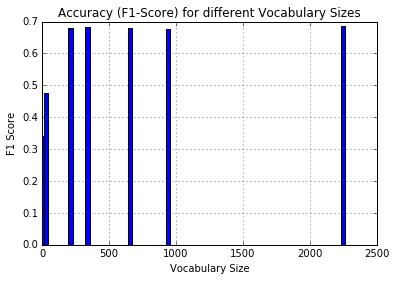

In [45]:
def getNonZero(coef):
    nz_idx = []
    for i in range(0, len(coef[0])):
        if ((coef[0][i] > 0) or (coef[1][i] > 0) or (coef[2][i] > 0) or (coef[3][i] > 0)):
            nz_idx.append(i)
    return nz_idx

def P6(cvalues):
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    p6vectorizer = CountVectorizer()
    p6train_data = p6vectorizer.fit_transform(train_data)

    # Use the same vectorizer as the training data, so that the same vocabulary is used
    p6dev_data = p6vectorizer.transform(dev_data)

    p6LRclf = LogisticRegression(C=0.1, penalty='l2')
    p6LRclf.fit(p6train_data,train_labels)
    p6LRprediction = p6LRclf.predict(p6dev_data)

    nonzero_idx = getNonZero(p6LRclf.coef_)
    print("Number of non-zero coefficients with L2 regularization is ", len(nonzero_idx))
    
    p6LRclf = LogisticRegression(C=0.1, penalty='l1')
    p6LRclf.fit(p6train_data,train_labels)
    p6LRprediction = p6LRclf.predict(p6dev_data)

    nonzero_idx = getNonZero(p6LRclf.coef_)
    print("Number of non-zero coefficients with L1 regularization is ",len(nonzero_idx))

    vocabsize = []
    f1score = []
    
    for c in cvalues:
        #print("in for loop")
        p6vect = CountVectorizer()
        p6L1train_data = p6vect.fit_transform(train_data)
        
        # Train Logistic Regression with L1 and get non-zero coeffs 
        p6L1LRclf = LogisticRegression(C=c, penalty='l1', tol=0.01)
        p6L1LRclf.fit(p6L1train_data, train_labels)
        nonzero_idx = getNonZero(p6L1LRclf.coef_)
        vocabsize.append(len(nonzero_idx))
    
        nzfeatures = np.unique(np.nonzero(p6L1LRclf.coef_)[1])
        nzvocab = np.array(p6vect.get_feature_names())[nzfeatures]
                
        # Get the non-zero vocabulary and try Logistic Regression with L2
        p6vect = CountVectorizer(vocabulary=nzvocab)
        p6L2train_data = p6vect.fit_transform(train_data)
        p6L2dev_data = p6vect.transform(dev_data)
        p6L2LRclf = LogisticRegression(C=c, penalty='l2', tol=0.01)
        p6L2LRclf.fit(p6L2train_data, train_labels)

        # Get accuracy - F1 scores
        f1score.append(p6L2LRclf.score(p6L2dev_data, dev_labels))
           
    return vocabsize, f1score
    
### STUDENT END ###
cvalues = [0.001, 0.01, 0.1, 0.2, 0.5, 1, 10]
vocabsize, f1score = P6(cvalues)

# Make a plot showing accuracy of the re-trained model vs. the vocabulary size
N = len(vocabsize)
width = 35
plt.bar(vocabsize, f1score, width=width, color="blue")
plt.grid(True)
plt.xlabel('Vocabulary Size')
plt.ylabel('F1 Score')
plt.title('Accuracy (F1-Score) for different Vocabulary Sizes')

plt.show()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [38]:
#def P7():
    ### STUDENT START ###

#Get the baseline F1
p7vectorizer = TfidfVectorizer()
p7train_data = p7vectorizer.fit_transform(train_data)

# Use the same vectorizer as the training data, so that the same vocabulary is used
p7dev_data = p7vectorizer.transform(dev_data)

P7LRclf = LogisticRegression(C=100)
P7LRclf.fit(p7train_data,train_labels)
P7LRprediction = P7LRclf.predict(p7dev_data)
P7predicted_prob = P7LRclf.predict_proba(p7dev_data)

#print((P7predicted_prob))

# show the top 3 documents where the ratio R is largest
R = [max(x)/x[dev_labels[i]] for i,x in enumerate(P7predicted_prob) ]
documentindex = np.argsort(-np.array(R))[:3]

for di in documentindex:
    print("\nDocument {}".format(di))
    print("Predicted Category: ", format(newsgroups_train.target_names[P7LRprediction[di]]))
    print("Actual Category: ", format(newsgroups_train.target_names[dev_labels[di]]))
    print(dev_data[di])
    print("\n")

#print(P7LRprediction)
#print("Baseline F1 score for Logistic Regression algorithm is ", metrics.f1_score(dev_labels, P7LRprediction, average='macro'))
    ### STUDENT END ###
#P7()


Document 215
Predicted Category:  comp.graphics
Actual Category:  talk.religion.misc
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of thi

ANSWER:
TfidfVectorizer -- how is this different from the CountVectorizer?
Term Frequency - Inverse Document Frequency transformation normalizes the counts of the terms that occur very frequently in a document (such as 'a', 'an', 'the') to allow focus on more unique terms that occur less frequently in the document.

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see?
1. From document 215 you can notice that the model miscategorizes the class of the document based on features such as ftp, postscript, RTF, ASCII. n-grams such as "Book of Mormon" should have been prioritized  over the other words. 

A fix to this issue would be provide to create a sub-set of n-grams with a higher weight for each class. For example:
sci.space - 'NASA', 'big bang', 'asteroid', 'meteorite'
talk.religion.misc - 'Mormon', 'God', 'Christ', 'Jesus'
comp.graphics - 'SVG', 'PNG', 'bitmap'
Due to the higher weight, these features or words would nudge the documents to the right class

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance